1.How to smooth speed caculation


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xml.etree.ElementTree as etree 
import datetime
import os
import json
import pandas as pd
import numpy as np
from collections import Counter
#import sklearn

# Import Data into Python

In [423]:
#activity_file = "D:/downloads/activity_873783146.tcx" # Naul cycle with Barry
activity_file = "D:/downloads/activity_898238015.tcx" # Great Dublin Cycle

In [184]:
# open data file and check a few lines from file

num = 2
i = 0
with open(activity_file) as f:
    for line in f:
        i += 1
        if i < num:
            print (line)
        else:
            break

<?xml version="1.0" encoding="UTF-8"?>



## Process XML File

In [424]:
import xml.etree.ElementTree as etree 
tree = etree.parse(activity_file) 
root = tree.getroot()[0][0]
print("Print representation of root: " + str(root) )
print("Print root tag: " + str(root.tag))
print("Print root attribute: " + str(root.attrib))
print("Number of children for root is: " + str(len(root)) )
number_of_laps = len(root) - 2
print("Number of laps is: " + str( number_of_laps ) )

Print representation of root: <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Activity' at 0x101E2E10>
Print root tag: {http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Activity
Print root attribute: {'Sport': 'Biking'}
Number of children for root is: 3
Number of laps is: 1


In [425]:
for i in root:
    print (i)

<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Id' at 0x101E2A50>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x101E2A80>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Creator' at 0x14F4A750>


In [ ]:
#Need to get a list of laps from XML file

In [428]:
# Create a List object called my_data
from datetime import datetime
my_data = []

#for lap in [1,2,3]:
for lap in range(1, number_of_laps + 1):
    data = {}
    for i in root[lap][9]:
        #print (i)
        if len(data) > 0:
            my_data.append(data)
        data = {}
        for j in i:
            
            #print(j.tag + ' ' + j.text)
            if "Time" in j.tag:
                #print ("Time is " + j.text)
                #data['time']= j.text
                data['time'] = datetime.strptime(  j.text[0:19], "%Y-%m-%dT%H:%M:%S" )
            elif "DistanceMeters" in j.tag:
                #print ("Distance is " + j.text)
                data['distance']= float(j.text)
            elif "HeartRateBpm" in j.tag:
                for k in j:
                    #print ("Heart Rate is " +  k.text)
                    data['heart_rate']= int(k.text)
            elif "Cadence" in j.tag:
                #print ("Cadence is " + j.text)
                data['cadence']= int(j.text)
            elif "Altitude" in j.tag:
                #print ("Cadence is " + j.text)
                data['altitude']= float(j.text)
            elif "Position" in j.tag:
                for k in j:
                    #print ("Heart Rate is " +  k.text)
                    if "Latitude" in k.tag:
                        data['latitude']= float(k.text)
                    elif "Longitude" in k.tag:
                        data['longitude']= float(k.text)
            else:
                print(j.tag, j.text)
    if len(data) > 0:
        my_data.append(data)
        #print data
    

The output of above program is a list object.   
Each list item is a dictionary, corresponding to a single data point

## Check the my_data Python data collection

The list object my_data is converted into a json object.    
Here is the code to do this:  
    my_data_dict = { 'data_points': my_data }

In [429]:
print(my_data[:3])
my_data_dict = { 'data_points': my_data }
#my_data_json[:300]
#xxxx = json.dumps(my_data_json)
my_data_dict['data_points'][0]['time']
len(my_data_dict['data_points'][:2])
my_data_dict['data_points'][:2]

[{'longitude': -6.190182846039534, 'heart_rate': 103, 'distance': 5.010000228881836, 'altitude': 79.4000015258789, 'time': datetime.datetime(2015, 9, 13, 6, 25, 51), 'cadence': 76, 'latitude': 53.36370773613453}, {'longitude': -6.190518541261554, 'heart_rate': 106, 'distance': 28.09000015258789, 'altitude': 90.80000305175781, 'time': datetime.datetime(2015, 9, 13, 6, 25, 56), 'cadence': 83, 'latitude': 53.363760793581605}, {'longitude': -6.1906137596815825, 'heart_rate': 106, 'distance': 34.7400016784668, 'altitude': 90.80000305175781, 'time': datetime.datetime(2015, 9, 13, 6, 25, 57), 'cadence': 84, 'latitude': 53.36377898231149}]


[{'altitude': 79.4000015258789,
  'cadence': 76,
  'distance': 5.010000228881836,
  'heart_rate': 103,
  'latitude': 53.36370773613453,
  'longitude': -6.190182846039534,
  'time': datetime.datetime(2015, 9, 13, 6, 25, 51)},
 {'altitude': 90.80000305175781,
  'cadence': 83,
  'distance': 28.09000015258789,
  'heart_rate': 106,
  'latitude': 53.363760793581605,
  'longitude': -6.190518541261554,
  'time': datetime.datetime(2015, 9, 13, 6, 25, 56)}]

# Create the Data Frame of Time Series Data

The dataframe is simple to create - just pass the my_data list object to the pd.DataFrame constructor.

In [188]:
# del df
df = pd.DataFrame(my_data)

## Examine properties of the new dataframe

In [189]:
#shape: gives the axis dimensions of the object, consistent with ndarray
print (' The DataFrame length attribute gives ' + str( len(df.index) ) )
print (' The DataFrame shape attribute gives ' + str(df.shape) )
print (' The DataFrame ndim attribute gives ' + str(df.ndim) )
print('\n\nThe Columns are:')
print (df.columns )
print('\n\nThe index  is:')
print (df.index )

 The DataFrame length attribute gives 5358
 The DataFrame shape attribute gives (5358, 7)
 The DataFrame ndim attribute gives 2


The Columns are:
Index(['altitude', 'cadence', 'distance', 'heart_rate', 'latitude',
       'longitude', 'time'],
      dtype='object')


The index  is:
Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9, 
            ...
            5348, 5349, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5357],
           dtype='int64', length=5358)


##  Create Time Series Index

In [190]:
#create index on time
# should use the df.reindex
print('Create a new time index for time series analysis')
df.set_index('time', inplace=True)
print('\n\nThe index  is:')
print (df.index )

Create a new time index for time series analysis


The index  is:
DatetimeIndex(['2015-09-13 06:25:51', '2015-09-13 06:25:56',
               '2015-09-13 06:25:57', '2015-09-13 06:26:00',
               '2015-09-13 06:26:03', '2015-09-13 06:26:07',
               '2015-09-13 06:26:13', '2015-09-13 06:26:14',
               '2015-09-13 06:26:17', '2015-09-13 06:26:20', 
               ...
               '2015-09-13 11:31:22', '2015-09-13 11:31:28',
               '2015-09-13 11:31:33', '2015-09-13 11:31:40',
               '2015-09-13 11:31:45', '2015-09-13 11:31:47',
               '2015-09-13 11:31:50', '2015-09-13 11:31:51',
               '2015-09-13 11:31:55', '2015-09-13 11:32:02'],
              dtype='datetime64[ns]', name='time', length=5358, freq=None, tz=None)


## Add a new Sequence Number column

In [191]:
#add a sequence number
print('Add a new seq_num column')
df['seq_num'] = list( range( len(df.index) ) )
#df.describe()

Add a new seq_num column


## Re-order the columns in the dataframe

In [192]:
#reorder the columns
df = df[ ['seq_num','longitude','latitude','cadence','altitude','heart_rate','distance'] ]
df.describe()

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance
count,5358.000000,5347.000000,5347.000000,5312.000000,5358.000000,5358.000000,5347.000000
mean,2678.500000,-6.301922,53.491536,65.521273,111.955730,128.561590,55305.131840
std,1546.865702,0.083439,0.093893,34.935758,36.721701,13.721647,28127.615377
min,0.000000,-6.449606,53.345526,0.000000,54.799999,85.000000,5.010000
25%,1339.250000,-6.381119,53.397380,57.000000,78.000000,118.000000,35449.244141
50%,2678.500000,-6.293268,53.495561,78.000000,119.400002,129.000000,56192.808594
75%,4017.750000,-6.258500,53.577163,89.000000,137.800003,139.000000,74205.464844
max,5357.000000,-6.122161,53.625859,128.000000,200.600006,162.000000,105730.960938


## Clean up the  cadence missing values

In [193]:
#fix the missing cadence values
# simply fill them with 0
df['cadence'].fillna(0, inplace=True)
df.describe()

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance
count,5358.000000,5347.000000,5347.000000,5358.000000,5358.000000,5358.000000,5347.000000
mean,2678.500000,-6.301922,53.491536,64.958753,111.955730,128.561590,55305.131840
std,1546.865702,0.083439,0.093893,35.306857,36.721701,13.721647,28127.615377
min,0.000000,-6.449606,53.345526,0.000000,54.799999,85.000000,5.010000
25%,1339.250000,-6.381119,53.397380,55.000000,78.000000,118.000000,35449.244141
50%,2678.500000,-6.293268,53.495561,78.000000,119.400002,129.000000,56192.808594
75%,4017.750000,-6.258500,53.577163,89.000000,137.800003,139.000000,74205.464844
max,5357.000000,-6.122161,53.625859,128.000000,200.600006,162.000000,105730.960938


# Calculate distance differences per data point

In [194]:
# calculate distance difference
df['distance_diff'] = df['distance'].diff().fillna(0)

In [385]:
print ( 'Total distance travelled is {:.1f} kms'.format( df['distance_diff'].sum() / 1000 ) ) 
print ( 'Number of data points  is   {:,}'.format( df['distance_diff'].count() ) ) 
print ( 'Number of data points  where distance travelled is Null is   ' + str( df['distance_diff'][df['distance_diff'].isnull() == True].count() ) ) 


Total distance travelled is 105.3 kms
Number of data points  is   5,358
Number of data points  where distance travelled is Null is   0


In [208]:
# check where distance less than one meter
print ( 'Number o data points where , where distance inc is < 1 meter  is   ' 
       + str( df['distance_diff'][df['distance_diff'] < 1.0].count() ) )
print ( 'Total distance travelled, where inc is < 1 meter  is   ' 
       + str( df['distance_diff'][df['distance_diff'] < 1.0].sum() ) )

# set these points to distance of zero
df['distance_diff'][df['distance_diff'] < 1.0] = 0

Number o data points where , where distance inc is < 1 meter  is   39
Total distance travelled, where inc is < 1 meter  is   0.0


c:\users\pclaffey\envs\garmin2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [196]:
df['distance_diff'].describe()

count    5358.000000
mean       19.662261
std        18.061741
min         0.000000
25%         6.931396
50%        11.113281
75%        28.084473
max        68.839844
Name: distance_diff, dtype: float64

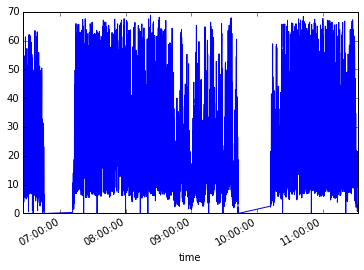

In [197]:
df['distance_diff'].plot()

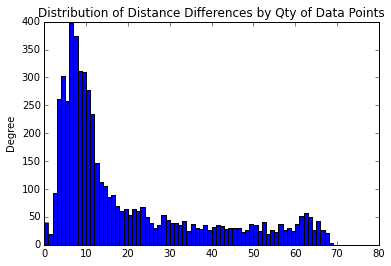

In [211]:
#plot a histogram of distance diff
df['distance_diff'].plot( kind = 'hist',
                         normed = False,
                         xlim = (0,80),
                         bins = range(80),
                         title = "Distribution of Distance Differences by Qty of Data Points",
                         )

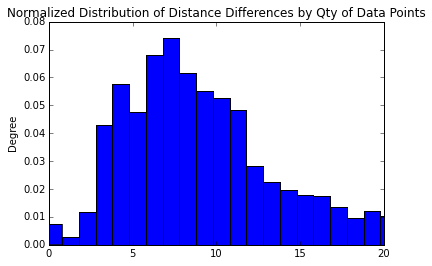

In [205]:
#plot a histogram of distance diff
df['distance_diff'].plot( kind = 'hist',
                         normed = True,
                         xlim = (0,20),
                         bins  =np.arange(80.0) -.2,  
                         title = "Normalized Distribution of Distance Differences by Qty of Data Points",
                         )


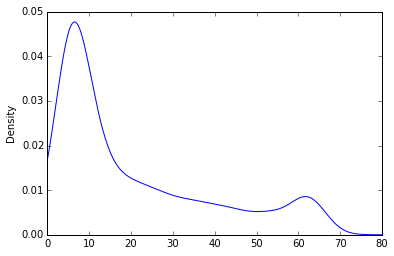

In [141]:
#plot a histogram of distance diff
df['distance_diff'].plot( kind = 'kde',
                         xlim = (0,80),
                         )

## Time Difference Calculations

In [200]:
# based on index work out time difference in seconds
# default missing time difference (expecially first position) to 1 second
df['time_diff'] = df.index.to_series().diff().fillna(1).apply( lambda x: int( x / np.timedelta64(1, 's') ) )
df.describe()

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance,distance_diff,time_diff
count,5358.000000,5347.000000,5347.000000,5358.000000,5358.000000,5358.000000,5347.000000,5358.000000,5358.000000
mean,2678.500000,-6.301922,53.491536,64.958753,111.955730,128.561590,55305.131840,19.662261,3.428891
std,1546.865702,0.083439,0.093893,35.306857,36.721701,13.721647,28127.615377,18.061741,32.195810
min,0.000000,-6.449606,53.345526,0.000000,54.799999,85.000000,5.010000,0.000000,1.000000
25%,1339.250000,-6.381119,53.397380,55.000000,78.000000,118.000000,35449.244141,6.931396,1.000000
50%,2678.500000,-6.293268,53.495561,78.000000,119.400002,129.000000,56192.808594,11.113281,1.000000
75%,4017.750000,-6.258500,53.577163,89.000000,137.800003,139.000000,74205.464844,28.084473,4.000000
max,5357.000000,-6.122161,53.625859,128.000000,200.600006,162.000000,105730.960938,68.839844,1775.000000


In [386]:
print ( 'Total activity elapsed time  is  {:,} seconds '.format( df['time_diff'].sum() ) ) 
print ( 'Total activity elapsed time  is  {:.2f} hours '.format( df['time_diff'].sum() / 3600 ) ) 
print ( 'Number of data points  is   {:,}'.format( df['time_diff'].count() ) ) 
print ( 'Number of data points  where time diff is Null is   ' + str( df['time_diff'][df['time_diff'].isnull() == True].count() ) )

Total activity elapsed time  is  18,372 seconds 
Total activity elapsed time  is  5.10 hours 
Number of data points  is   5,358
Number of data points  where time diff is Null is   0


## Speed Calculation

In [220]:
#speed calculation in km/hr
df['speed'] = (df['distance_diff'] / df['time_diff']  ).apply(lambda x: round(x * 3.6 ,1) )
#df[ df['moving'] == False ].describe()

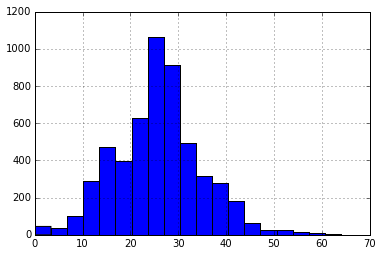

In [222]:
df['speed'].hist(bins=20)

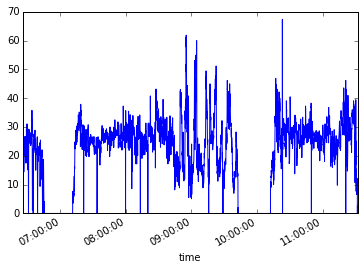

In [234]:
df['speed'].plot()

In [230]:
print ( 'Number of data points  where speed is Null is   ' + str( df['speed'][df['speed'].isnull() == True].count() ) )
print ( 'Number of data points  where speed is < 1 km/hr is   ' + str( df['speed'][df['speed'] < 1.0].count() ) )
print ( 'Number of data points  where speed is < 5 km/hr is   ' + str( df['speed'][df['speed'] < 5.0].count() ) )
#print ( 'Number of data points  where speed is < 7 km/hr is   ' + str( df['speed'][df['speed'] < 7.0].count() ) )

Number of data points  where speed is Null is   0
Number of data points  where speed is < 1 km/hr is   40
Number of data points  where speed is < 5 km/hr is   55


In [388]:
#speed greater than 60
df[df['speed'] > 60.0]

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance,distance_diff,time_diff,speed,moving,altitude_diff,gradient,breaks
time,,,,,,,,,,,,,,
2015-09-13 08:55:16,2278,-6.286545,53.581767,0,143.000000,120,51706.980469,16.921875,1,60.9,True,-1.199997,-7.091395,False
2015-09-13 08:55:17,2279,-6.286645,53.581908,0,141.600006,120,51723.980469,17.000000,1,61.2,True,-1.399994,-8.235258,False
2015-09-13 08:55:19,2281,-6.286854,53.582180,0,139.399994,120,51757.238281,17.207031,1,61.9,True,-1.200012,-6.973964,False
2015-09-13 10:23:16,4045,-6.405866,53.535178,6,134.600006,128,74837.101562,18.710938,1,67.4,True,-0.399994,-2.137754,False


In [390]:
#df[2280-10: 2280 +10]
df[4045-10: 4045 +10]

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance,distance_diff,time_diff,speed,moving,altitude_diff,gradient,breaks
time,,,,,,,,,,,,,,
2015-09-13 10:22:16,4035,-6.407254,53.538984,79,135.000000,131,74402.078125,17.179688,4,15.5,True,0.000000,0.000000,False
2015-09-13 10:22:21,4036,-6.407159,53.538725,83,135.000000,132,74431.632812,29.554688,5,21.3,True,0.000000,0.000000,False
2015-09-13 10:22:30,4037,-6.406924,53.538187,95,135.000000,134,74493.500000,61.867188,9,24.7,True,0.000000,0.000000,False
2015-09-13 10:22:38,4038,-6.406679,53.537689,83,135.000000,135,74551.218750,57.718750,8,26.0,True,0.000000,0.000000,False
2015-09-13 10:22:46,4039,-6.406473,53.537140,96,135.000000,134,74613.882812,62.664062,8,28.2,True,0.000000,0.000000,False
2015-09-13 10:22:54,4040,-6.406308,53.536557,93,135.000000,133,74679.617188,65.734375,8,29.6,True,0.000000,0.000000,False
2015-09-13 10:22:59,4041,-6.406165,53.536232,79,135.000000,133,74716.906250,37.289062,5,26.8,True,0.000000,0.000000,False
2015-09-13 10:23:01,4042,-6.406117,53.536113,78,135.000000,132,74730.507812,13.601562,2,24.5,True,0.000000,0.000000,False
2015-09-13 10:23:07,4043,-6.405963,53.535771,90,135.000000,131,74769.898438,39.390625,6,23.6,True,0.000000,0.000000,False


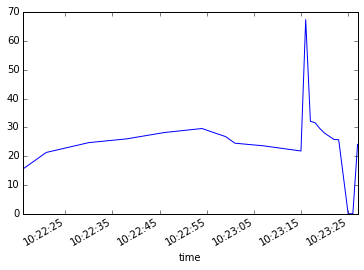

In [391]:
df[4045-10: 4045 +10].speed.plot()

#### Moving time calculation

In [266]:
df[ df['speed'] < 1.0 ][:5]

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance,distance_diff,time_diff,speed,moving,altitude_diff,gradient
time,,,,,,,,,,,,,
2015-09-13 06:25:51,0,-6.190183,53.363708,76,79.400002,103,5.010000,0,1,0,False,0.000000,NaN
2015-09-13 06:31:02,106,-6.214631,53.361343,0,76.199997,104,1973.030029,0,1,0,False,-0.400002,0
2015-09-13 06:31:03,107,-6.214648,53.361340,0,75.800003,103,1973.780029,0,1,0,False,-0.399994,0
2015-09-13 06:31:04,108,-6.214652,53.361335,0,75.400002,103,1974.380005,0,1,0,False,-0.400002,0
2015-09-13 06:35:22,166,NaN,NaN,0,75.400002,119,NaN,0,1,0,False,0.000000,NaN


In [245]:
df[ df['speed'] > 60.0 ]

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance,distance_diff,time_diff,speed
time,,,,,,,,,,
2015-09-13 08:55:16,2278,-6.286545,53.581767,0,143.000000,120,51706.980469,16.921875,1,60.9
2015-09-13 08:55:17,2279,-6.286645,53.581908,0,141.600006,120,51723.980469,17.000000,1,61.2
2015-09-13 08:55:19,2281,-6.286854,53.582180,0,139.399994,120,51757.238281,17.207031,1,61.9
2015-09-13 10:23:16,4045,-6.405866,53.535178,6,134.600006,128,74837.101562,18.710938,1,67.4


In [233]:
df[ ['distance_diff', 'time_diff', 'moving', 'speed'] ][ df['speed'] < 1.0 ].sum()

distance_diff       2.53125
time_diff        3427.00000
moving             29.00000
speed               0.00000
dtype: float64

In [248]:
# use speed as condition to set the moving column
df['moving'] =  (df.speed >= 1.0)

In [251]:
print ( 'Number of data points  where not moving is   ' + str( df['moving'][ df.moving == False].count() ) )
print ( 'Total activity elapsed time  is  {:,} seconds '.format( df['time_diff'].sum() ) ) 
print ( 'Total activity elapsed time  is  {:.2f} hours '.format( df['time_diff'].sum() / 3600 ) ) 
print ( 'Total activity elapsed time  is  {:,} seconds '.format( df['time_diff'][ df.moving == True].sum() ) ) 
print ( 'Total activity elapsed time  is  {:.2f} hours '.format( df['time_diff'][ df.moving == True].sum() / 3600 ) ) 

Number of data points  where not moving is   40
Total activity elapsed time  is  18,372 seconds 
Total activity elapsed time  is  5.10 hours 
Total activity elapsed time  is  14,945 seconds 
Total activity elapsed time  is  4.15 hours 


## Altitude and Gradient Calculation

In [255]:
df['altitude_diff'] = df['altitude'].diff().fillna(0) 

In [256]:
#gradient calculation
df['gradient'] = ( df['altitude_diff'] * 100 ) / df['distance_diff']

In [263]:
# here gradient is -inf or +inf
# correct these values and set to zero
df[ (df['gradient'] > 100) |  (df['gradient'] < -100) ]
df['gradient'][ (df['gradient'] > 100) |  (df['gradient'] < -100) ] = 0.0

c:\users\pclaffey\envs\garmin2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [268]:
gradient_threshold = 15
df['gradient'][ (df.gradient > gradient_threshold)  ] = gradient_threshold 
df['gradient'][  (df.gradient < -1 * gradient_threshold) ] = -1 * gradient_threshold 

c:\users\pclaffey\envs\garmin2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
c:\users\pclaffey\envs\garmin2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [273]:
df['gradient'] = df['gradient'].fillna(0.0)

In [334]:
df.head(2)

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance,distance_diff,time_diff,speed,moving,altitude_diff,gradient,breaks
time,,,,,,,,,,,,,,
2015-09-13 06:25:51,0,-6.190183,53.363708,76,79.400002,103,5.01,0.00,1,0.0,False,0.000000,0,False
2015-09-13 06:25:56,1,-6.190519,53.363761,83,90.800003,106,28.09,23.08,5,16.6,True,11.400002,15,False


## Add a breaks columns

note ths column is call breaks because break is a Python keyword

In [335]:
df['breaks'] = (df['time_diff'] > 600)
df[ (df['time_diff'] > 600) ]

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance,distance_diff,time_diff,speed,moving,altitude_diff,gradient,breaks
time,,,,,,,,,,,,,,
2015-09-13 07:11:26,329,-6.278896,53.346748,0,74.000000,102,6910.580078,0.00000,1546,0,False,-6.199997,0,True
2015-09-13 10:12:23,3717,-6.384032,53.565620,45,177.199997,115,70205.281250,2.53125,1775,0,False,2.199997,15,True


### Identifying the locators for the breaks

In [350]:
num_breaks = df.breaks[ (df.breaks == True) ].count()
break_locators = []
for i in range(0, num_breaks):
    break_locators.append( df.index.get_loc( df[df.breaks == True].index[i] ) )
    print ('location_break' + str(i + 1) + 
           ' at integer location ' + str(df.index.get_loc( df[df.breaks == True].index[i] )) )
break_locators

location_break1 at integer location 329
location_break2 at integer location 3717


[329, 3717]

## Splitting ride into Segments

In [365]:
segments = []
segments.append ( df.iloc[  : break_locators[0] ] )

for i in range(1,num_breaks):
    segments.append( df.iloc[ break_locators[i-1] + 1  : break_locators[i] ])
    
segments.append( df.iloc[ break_locators[num_breaks - 1] + 1  :  ]  )

segments[0].describe()

,seq_num,longitude,latitude,cadence,altitude,heart_rate,distance,distance_diff,time_diff,speed,moving,altitude_diff,gradient,breaks
count,329.000000,328.000000,328.000000,329.000000,329.000000,329.000000,328.000000,329.000000,329.000000,329.000000,329,329.000000,329.000000,329
mean,164.000000,-6.235683,53.358759,53.291793,79.668693,117.446809,3561.369601,20.942615,3.617021,20.467781,0.9574468,0.002432,-0.301291,0
std,95.118347,0.026713,0.005414,39.273276,3.688945,9.438071,2133.449993,17.838326,2.588521,7.260472,0.202155,0.696853,3.818658,0
min,0.000000,-6.277763,53.349735,0.000000,75.400002,98.000000,5.010000,0.000000,1.000000,0.000000,False,-1.800003,-15.000000,False
25%,82.000000,-6.258562,53.353795,0.000000,75.400002,111.000000,1536.320007,6.490234,1.000000,17.900000,1,0.000000,0.000000,0
50%,164.000000,-6.238211,53.361677,76.000000,79.599998,116.000000,3642.949951,13.869995,3.000000,21.900000,1,0.000000,0.000000,0
75%,246.000000,-6.209879,53.363313,86.000000,81.800003,123.000000,5394.392578,32.449707,6.000000,25.400000,1,0.000000,0.000000,0
max,328.000000,-6.190183,53.364699,116.000000,90.800003,142.000000,6910.229980,63.490234,10.000000,35.800000,True,11.400002,15.000000,False


In [370]:
segments[2].sum()

seq_num          7.441500e+06
longitude       -1.043131e+04
latitude         8.750484e+04
cadence          1.109530e+05
altitude         2.029692e+05
heart_rate       2.199200e+05
distance         1.435843e+08
distance_diff    3.544784e+04
time_diff        4.779000e+03
speed            4.544150e+04
moving           1.633000e+03
altitude_diff   -1.224000e+02
gradient        -4.489106e+02
breaks           0.000000e+00
dtype: float64

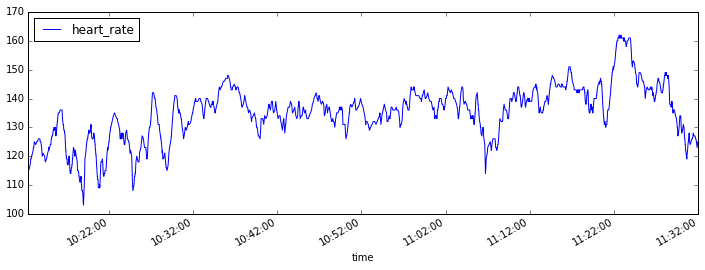

In [381]:
#segments[0][['heart_rate','speed','gradient']].describe()
#segments[0][['heart_rate','speed','gradient']].plot()
segments[2][['heart_rate']].plot(figsize=(12,4),)

c:\users\pclaffey\envs\garmin2\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


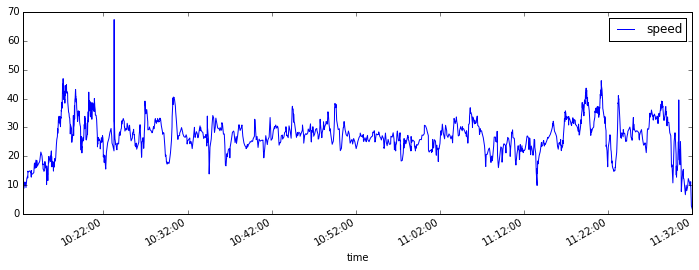

In [382]:
segments[2][['speed']][df.moving == True].plot(figsize=(12,4),)

In [395]:
great_dublin = pd.concat([segments[1] , segments[2] ])
great_dublin['time_diff'].sum() / 3600

3.8502777777777779

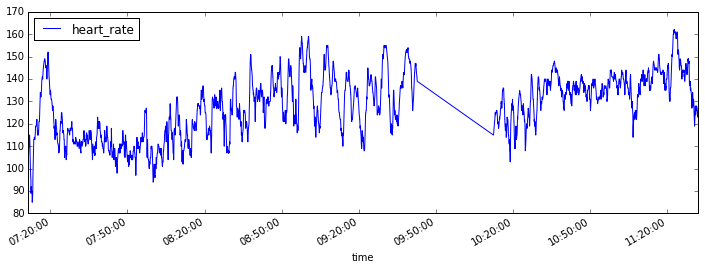

In [396]:
great_dublin[['heart_rate']].plot(figsize=(12,4),)

## Heart Rate Calculations

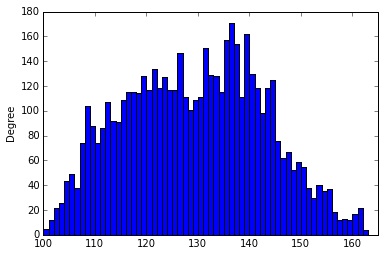

In [292]:
df.heart_rate.plot(kind = 'hist',
                   bins=range(170),
                  xlim=(100,165))

In [293]:
#grouped = df[ [df['speed'] >= .5] ].groupby(df['heart-rate']
grouped = df[ df['speed'] >= .5 ].groupby(df['heart-rate'])
grouped2 = df[ df['speed'] >= .5 ].groupby(df['heart-rate'].apply( lambda i: (i - i%10) + 5 ))
#if less than 100 then round up to 100
grouped3 = df[ df['speed'] >= .5 ].groupby(df['heart-rate'].apply( lambda i: (100 if i< 100 else i - i%10) + 5 ))

c:\users\pclaffey\envs\garmin2\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


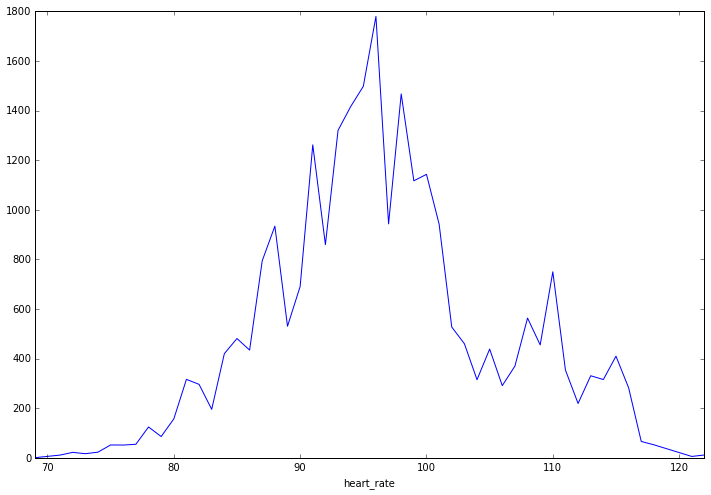

In [29]:
grouped = seg1[ df['speed'] >= .5 ].groupby(df['heart_rate'])
grouped['distance_diff'].sum().plot(figsize=(12,8))

c:\users\pclaffey\envs\garmin2\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


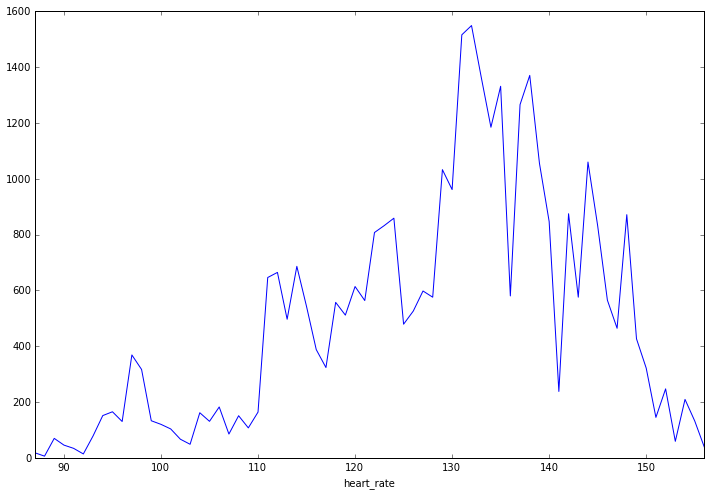

In [364]:
grouped = seg2[ df['speed'] >= .5 ].groupby(df['heart_rate'])
grouped['distance_diff'].sum().plot(figsize=(12,8))

c:\users\pclaffey\envs\garmin2\lib\site-packages\pandas\core\frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


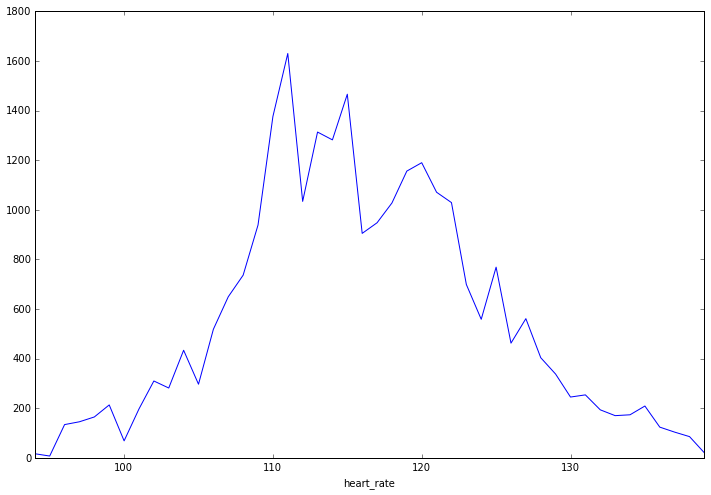

In [367]:
grouped = seg3[ df['speed'] >= .5 ].groupby(df['heart_rate'])
grouped['distance_diff'].sum().plot(figsize=(12,8))

In [259]:
elapsed_time = df['time_diff'].sum()
print("elapsed time is " + str(elapsed_time))

elapsed time is 21784


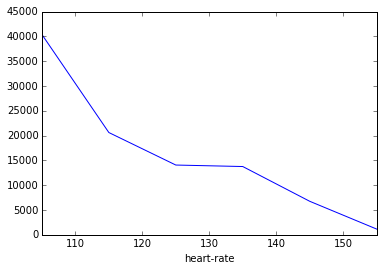

In [296]:
#print(grouped['time_diff'].sum().sum())
grouped3['distance_diff'].sum().plot()
#grouped['altitude'].sum().plot()

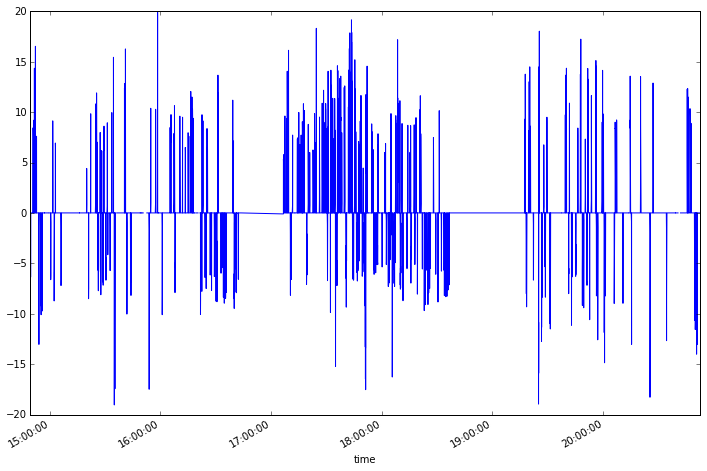

In [185]:
df['gradient'].plot(figsize=(12,8))

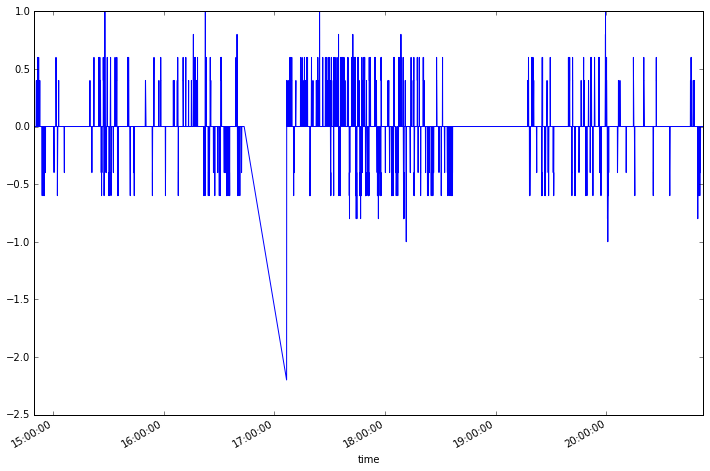

In [186]:
df['altitude_diff'].plot(figsize=(12,8))

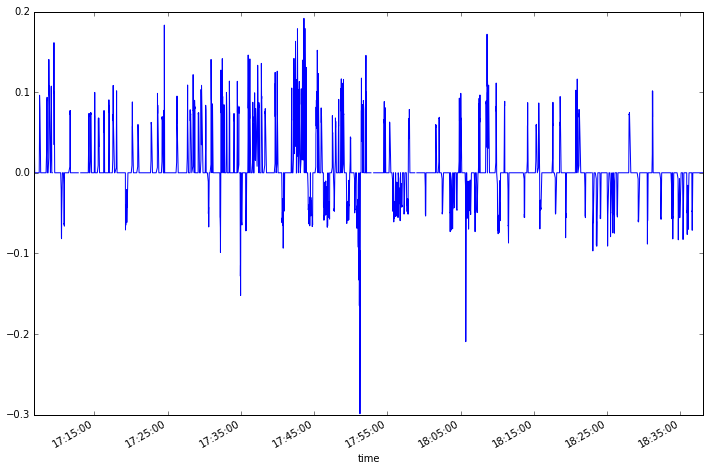

In [72]:
seg2['gradient'].plot(figsize=(12,8))

In [176]:
def time_to_seconds(x):
    return x / np.timedelta64(1, 's')

In [63]:
#calculate change in distance

last_val = 0
hold_dist = []
for i in list(df.distance ):
    #print(i, i - last_val)
    hold_dist.append(i - last_val)
    last_val = i

In [64]:
df['distance_change'] = hold_dist

In [94]:
#calculate change in time
last_val = df.index[0].to_datetime()
hold_secs = []
for i in range(len(df)):
    curr_val = df.index[i].to_datetime()
    hold_secs.append( int( (curr_val - last_val).total_seconds() ) )
    last_val = curr_val

In [95]:
df['time_change'] = hold_secs

In [31]:
df.set_index('time', inplace=True)

In [ ]:
df.latitude.fillna('')

In [55]:
df[['altitude', 'distance', 'heart-rate']].resample('1Min', how='mean').fillna(method='bfill').head()

,altitude,distance,heart-rate
time,,,
2015-08-20 14:49:00,18.440000,23.338001,80.600000
2015-08-20 14:50:00,18.326316,275.274212,87.473684
2015-08-20 14:51:00,22.240000,524.523596,99.640000
2015-08-20 14:52:00,26.542857,762.865237,94.571429
2015-08-20 14:53:00,28.600000,1085.473333,91.666667


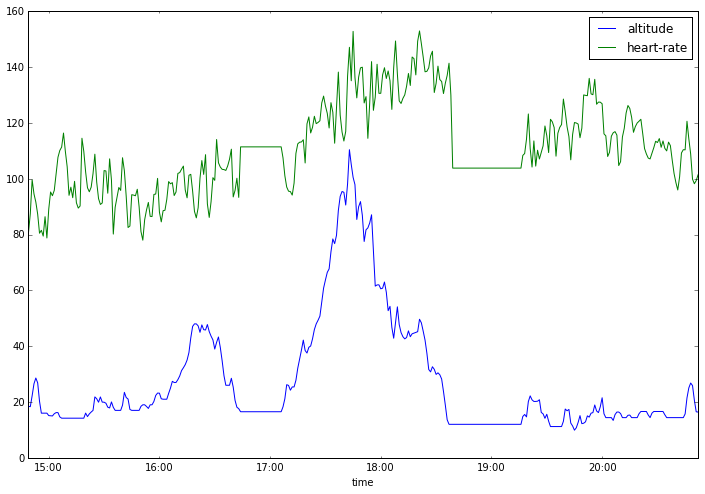

In [51]:
df[['altitude', 'heart-rate']].resample('1Min', how='mean').fillna(method='bfill').plot(figsize=(12,8))

In [9]:
from collections import Counter
import os

class MyCycle(object):

    def __init__(self, name):
        self.name = name
        #self.data_point_qty = data_point_qty
        self.file_name = 'activity_873783146.tcx'
        self.file_path = os.path.join('D:','downloads', self.file_name)
        print ('File name and path is ', self.file_path)
        
        

class TimeSeries(MyCycle):

    def __init__(self, name, my_data, number_splits=None):
        
        #initialize parent
        super(TimeSeries, self).__init__(name)
        
        #load data
        self.my_data = my_data
        
        self.start_time = self.my_data['data_points'][0]['time']
        self.end_time = self.my_data['data_points'][-1]['time']
        
        
        self.number_splits = number_splits
        
        self.number_data_points = len(my_data['data_points'])
        
        
        self.my_diffs = []
        self.calculate_my_diffs()
        
        self.calculate_distribution()
        #self.split_journey()
        
        self.my_split_indexes = []
        self.calculate_split_indexes()
        
    def get_start_time(self):
        #return self.my_data['data_points'][0]['time'].strftime("%Y-%m-%dT%H:%M:%S" )
        return self.start_time.strftime("%Y-%m-%dT%H:%M:%S" )
    
    def get_end_time(self):
        return self.my_data['data_points'][-1]['time'].strftime("%Y-%m-%dT%H:%M:%S" )
        return self.end_time.strftime("%Y-%m-%dT%H:%M:%S" )
    
    def total_elapsed_time(self):
        return  str( self.my_data['data_points'][-1]['time'] - self.my_data['data_points'][0]['time'] )
    
    def get_heart_rate(self):
        self.heart_rate = []
        for i in range(self.number_data_points):
            self.heart_rate.append( self.my_data['data_points'][i]['heart-rate'] )
        return self.heart_rate
    
    def get_cadence(self):
        self.cadence = []
        for i in range(self.number_data_points):
            if 'cadence' in self.my_data['data_points'][i]: 
                self.cadence.append( self.my_data['data_points'][i]['cadence'] )
            else:
                self.cadence.append(0)
        return self.cadence
    
    def get_altitude(self):
        self.altitude = []
        self.prev_altitude = 0.0
        for i in range(self.number_data_points):
            if 'altitude' in self.my_data['data_points'][i]: 
                self.altitude.append( self.my_data['data_points'][i]['altitude'] )
                self.prev_altitude = self.my_data['data_points'][i]['altitude']
            else:
                self.altitude.append( self.prev_altitude )
        return self.altitude

    def get_seconds(self):
        '''
        for each data point 
        calculate the number of seconds 
        since start of cycle.
        
        '''
        self.my_seconds = []
        self.my_seconds.append(0)
        #for i in self.my_times[1:]:
        for j in range(1, self.number_data_points):
            i  =    self.my_data['data_points'][j]['time']
            #print i, i-prev
            self.my_seconds.append( int( (i-self.start_time).total_seconds()  ) )
        return self.my_seconds
            
    def get_distance(self):
        self.distance = []
        self.distance_inc = 0.0
        for i in range(self.number_data_points):
            if 'distance' in self.my_data['data_points'][i]: 
                self.distance.append( (self.my_data['data_points'][i]['distance'] ) / 1000.0 )
                self.distance_inc = self.my_data['data_points'][i]['distance']
            else:
                self.distance.append( self.distance_inc / 1000.0 )       
        return self.distance
            
    def get_distance_delta(self):
        self.distance_delta = [0.0]
        self.distance_prev = 0.0
        for i in range(1,self.number_data_points):
            if 'distance' in self.my_data['data_points'][i]: 
                self.distance_delta.append( self.my_data['data_points'][i]['distance'] - self.distance_prev )
                self.distance_prev = self.my_data['data_points'][i]['distance']
            else:
                self.distance_delta.append( 0.0 )       
        return self.distance_delta
    
    def calculate_my_diffs(self):
        self.prev = self.my_data['data_points'][0]['time']
        self.my_diffs.append(1)
        #for i in self.my_times[1:]:
        for j in range(1, self.number_data_points):
            i  =    self.my_data['data_points'][j]['time']
            #print i, i-prev
            self.my_diffs.append( int( (i-self.prev).total_seconds() ) )
            self.prev = i
            
    def calculate_distribution(self):
        self.my_diffs_counter = Counter(self.my_diffs)
        self.my_diffs_distribution = self.my_diffs_counter.items()
        
    def distance_distribution(self):
        return Counter( [round(i) for i in self.get_distance_delta() ])
    
    def calculate_split_indexes(self):
        self.diff_values = list(self.my_diffs_counter)
        self.diff_values.sort(reverse=True)
        for i in range(self.number_splits - 1):
            print ( self.diff_values[i] )
            print ( self.my_diffs.index(self.diff_values[i]) )
            self.my_split_indexes.append(self.my_diffs.index(self.diff_values[i]))
        self.my_split_indexes.sort()
    
        
    def get_splits(self, split_num):
        if split_num == 1:
            return { 'data_points' : self.my_data['data_points'][:self.my_split_indexes[0]] }
        elif split_num == self.number_splits:
            return { 'data_points' : self.my_data['data_points'][self.my_split_indexes[self.number_splits - 2]:] }
        else:
            return { 'data_points' : self.my_data['data_points'][self.my_split_indexes[split_num-2]:self.my_split_indexes[split_num-1]] }
        

        
        

In [10]:
blake = MyCycle("Blakes Cross - Barry" )
blake_t = TimeSeries("Blakes Cross - Barry",  my_data_dict, 3)
blake_t.get_start_time()
blake_t.get_end_time()
blake_t.my_diffs[:20]


blake_t1 = TimeSeries("Blakes Cross - Barry", blake_t.get_splits(1) , 0)
blake_t2 = TimeSeries("Blakes Cross - Barry", blake_t.get_splits(2) , 0)
blake_t3 = TimeSeries("Blakes Cross - Barry", blake_t.get_splits(3) , 0)
#blake_t2 = TimeSeries("Blakes Cross - Barry",  my_times[blake_t.my_split_indexes[0]:blake_t.my_split_indexes[1]], 0)
#blake_t3 = TimeSeries("Blakes Cross - Barry",  my_times[blake_t.my_split_indexes[1]:], 0)



File name and path is  D:downloads\activity_873783146.tcx
File name and path is  D:downloads\activity_873783146.tcx
2295
3546
1381
1711
File name and path is  D:downloads\activity_873783146.tcx
File name and path is  D:downloads\activity_873783146.tcx
File name and path is  D:downloads\activity_873783146.tcx


In [11]:
print (len(blake_t.my_diffs),  len(my_data_dict['data_points']))
#print (len(my_times), len(blake_t.my_diffs))

4742 4742


In [101]:
print(blake.name)
print(blake_t.name, blake_t.number_data_points, blake_t.start_time(),  blake_t.end_time() , blake_t.total_elapsed_time() )


Blakes Cross - Barry
('Blakes Cross - Barry', 4742, '2015-08-20T14:49:34', '2015-08-20T20:52:37', '6:03:03')


In [102]:
blake_t.my_diffs[:9]

[1, 1, 4, 6, 8, 8, 6, 5, 2]

In [173]:
blake = MyCycle("Blakes Cross - Barry" )
blake_t = TimeSeries("Blakes Cross - Barry",  my_data_dict, 3)

('File name and path is ', 'D:downloads\\activity_873783146.tcx')
('File name and path is ', 'D:downloads\\activity_873783146.tcx')
2295
3546
1381
1711


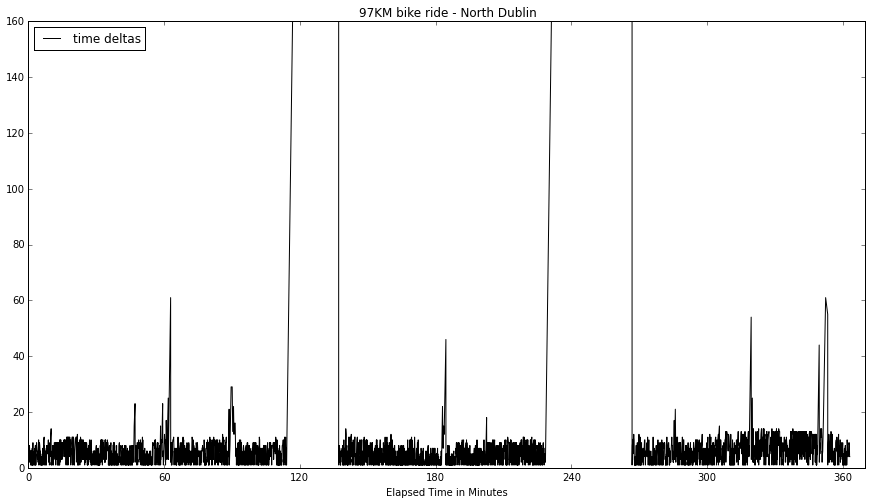

In [13]:
start = 0
start_min = 0
num_minutes = 370
minute_inc = 60
secs = [start_min * 60 + i*60 for i in range(0, num_minutes + 1, minute_inc)]
mins = [start_min  + i for i in range(0, num_minutes + 1, minute_inc)]

start = 0
points = len(blake_t.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
ll = plt.plot(blake_t.get_seconds(), blake_t.my_diffs, color='k', label='time deltas')
#ll = plt.plot(blake_t.get_seconds(), blake_t.heart_rate, color='r', label = 'heart rate (bpm)')
#ll = plt.plot(blake_t.get_seconds(), blake_t.get_altitude() , color='g', label = 'elevation (metres)')
ll=plt.legend(loc='upper left')
#plt.axis( [start,start + points,0,200])
plt.xticks( secs, mins)
plt.axis( [start_min*60, start_min*60 + num_minutes*60 ,0,160])
plt.xlabel('Elapsed Time in Minutes')
plt.title('97KM bike ride - North Dublin ')
plt.show()

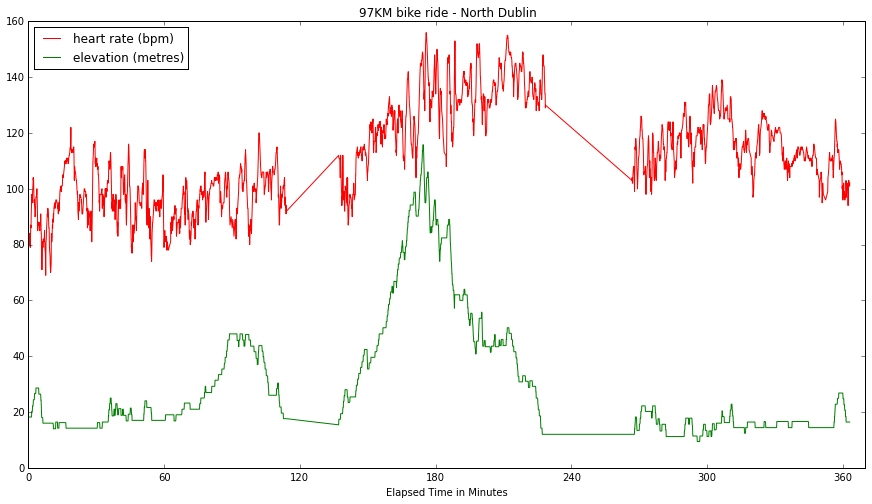

In [16]:
start = 0
start_min = 0
num_minutes = 370
minute_inc = 60
secs = [start_min * 60 + i*60 for i in range(0, num_minutes + 1, minute_inc)]
mins = [start_min  + i for i in range(0, num_minutes + 1, minute_inc)]

start = 0
points = len(blake_t.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.plot(blake_t.get_seconds(), blake_t.my_diffs, color='k', label='time deltas')
ll = plt.plot(blake_t.get_seconds(), blake_t.get_heart_rate(), color='r', label = 'heart rate (bpm)')
ll = plt.plot(blake_t.get_seconds(), blake_t.get_altitude() , color='g', label = 'elevation (metres)')
ll=plt.legend(loc='upper left')
#plt.axis( [start,start + points,0,200])
plt.xticks( secs, mins)
plt.axis( [start_min*60, start_min*60 + num_minutes*60 ,0,160])
plt.xlabel('Elapsed Time in Minutes')
plt.title('97KM bike ride - North Dublin ')
plt.show()

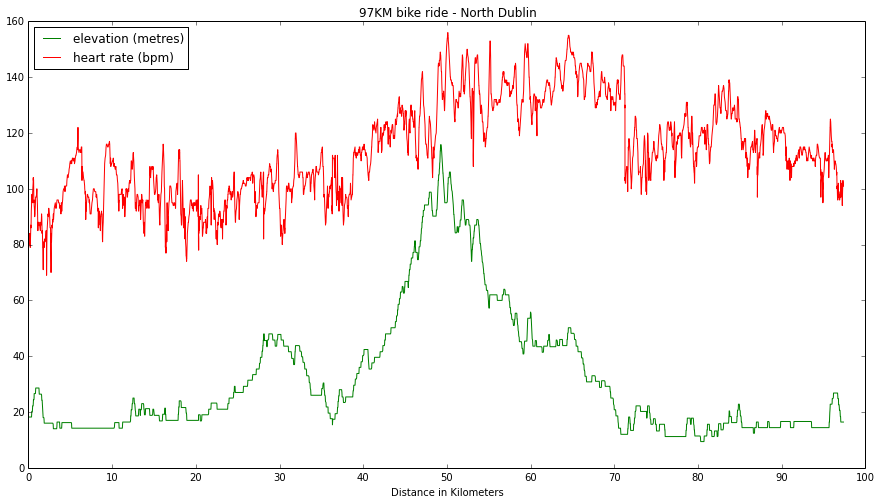

In [348]:
start = 0
start_km = 0
num_km = 100
km_inc = 10
#secs = [start_min * 60 + i*60 for i in range(0, num_minutes + 1, minute_inc)]
kms = [start_km  + i for i in range(0, num_km + 1, km_inc)]

start = 0
points = len(blake_t.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
#ll = plt.plot(blake_t.get_distance(), blake_t.my_diffs, color='k')
ll = plt.plot(blake_t.get_distance(), blake_t.get_altitude() , color='g', label = 'elevation (metres)')
ll = plt.plot(blake_t.get_distance(), blake_t.get_heart_rate(), color='r', label = 'heart rate (bpm)' )
ll=plt.legend(loc='upper left')
#plt.axis( [start,start + points,0,200])
plt.xticks( kms)
plt.axis( [start_km, start_km + num_km ,0,160])
plt.xlabel('Distance in Kilometers')
plt.title('97KM bike ride - North Dublin ')
plt.show()

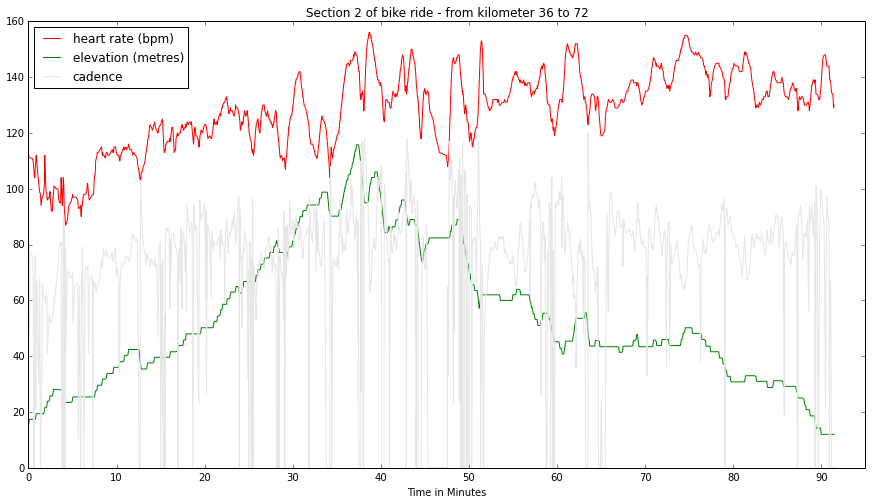

In [351]:
start = 0
start_min = 0
num_minutes = 95
minute_inc = 10
secs = [start_min * 60 + i*60 for i in range(0, num_minutes + 1, minute_inc)]
mins = [start_min  + i for i in range(0, num_minutes + 1, minute_inc)]
points = len(blake_t2.my_diffs)

fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
#ll = plt.plot(blake_t.get_distance(), blake_t.get_heart_rate() )
ll = plt.plot(blake_t2.get_seconds(), blake_t2.get_heart_rate(), color='r', label = 'heart rate (bpm)' )
ll = plt.plot(blake_t2.get_seconds(), blake_t2.get_altitude() , color='g', label = 'elevation (metres)' )
ll = plt.plot(blake_t2.get_seconds(), blake_t2.get_cadence() , color='.9' , label = 'cadence')
ll=plt.legend(loc='upper left')

plt.xticks( secs, mins)
plt.axis( [start_min*60, start_min*60 + num_minutes*60 ,0,160])
plt.xlabel('Time in Minutes')
plt.title('Section 2 of bike ride - from kilometer 36 to 72 ')
#plt.xticks([0,1800,3600,5400,7200],
#           [0,30,60,90,120])
#plt.axis( [start,6000,0,160])
plt.show()

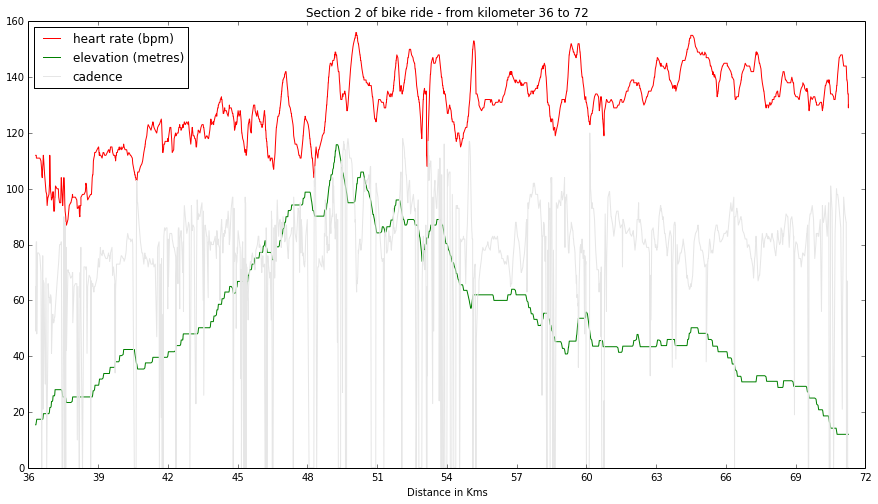

In [352]:
start_km = 36
num_km = 36
km_inc = 3
#secs = [start_min * 60 + i*60 for i in range(0, num_minutes + 1, minute_inc)]
kms = [start_km  + i for i in range(0, num_km + 1, km_inc)]


fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
#ll = plt.plot(blake_t.get_distance(), blake_t.get_heart_rate() )
ll = plt.plot(blake_t2.get_distance(), blake_t2.get_heart_rate(), color='r' , label = 'heart rate (bpm)')
ll = plt.plot(blake_t2.get_distance(), blake_t2.get_altitude() , color='g', label = 'elevation (metres)' )
ll = plt.plot(blake_t2.get_distance(), blake_t2.get_cadence() , color='.9', label = 'cadence' )
ll=plt.legend(loc='upper left')

plt.xticks( kms)
plt.axis( [start_km, start_km + num_km ,0,160])
plt.xlabel('Distance in Kms')
plt.title('Section 2 of bike ride - from kilometer 36 to 72 ')
plt.show()

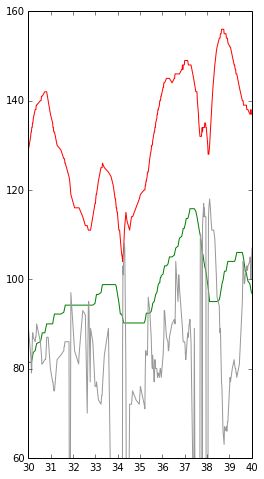

In [307]:
#start = 1000
#increment = 1000

start_min = 30
num_minutes = 10
minute_inc = 1
secs = [start_min * 60 + i*60 for i in range(0, num_minutes + 1, minute_inc)]
mins = [start_min  + i for i in range(0, num_minutes + 1, minute_inc)]
points = len(blake_t2.my_diffs)
fig = plt.figure(figsize=(4, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
#ll = plt.plot(blake_t.get_distance(), blake_t.get_heart_rate() )
ll = plt.plot(blake_t2.get_seconds(), blake_t2.get_heart_rate(), color='r' )
ll = plt.plot(blake_t2.get_seconds(), blake_t2.get_altitude() , color='g' )
ll = plt.plot(blake_t2.get_seconds(), blake_t2.get_cadence() , color='.6' )
#plt.xticks([0,1800,3600,5400,7200],
#           [0,30,60,90,120])
plt.xticks( secs, mins)
plt.axis( [start_min*60, start_min*60 + num_minutes*60 ,60,160])
plt.show()

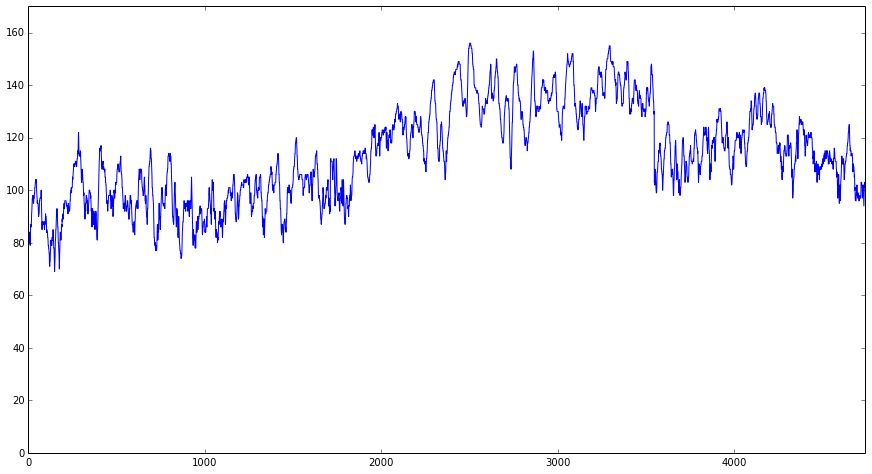

In [163]:
start = 0
points = len(blake_t.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(blake_t.get_heart_rate())
plt.axis( [start,start + points,0,170])
plt.show()

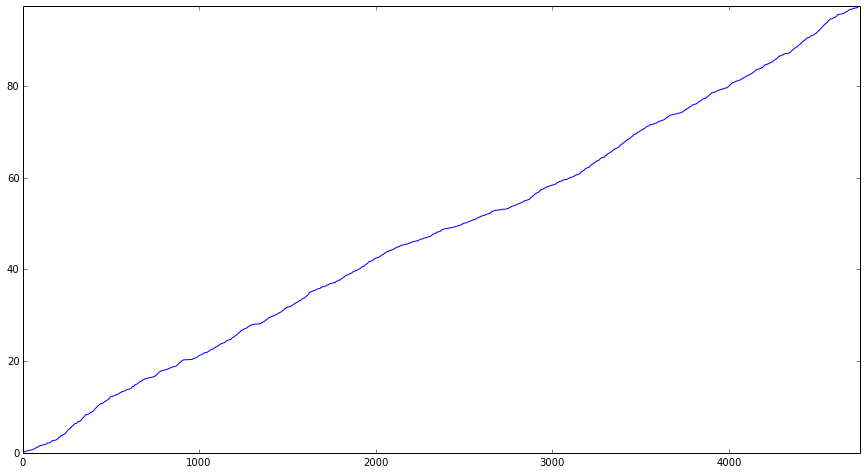

In [155]:
start = 0
points = len(blake_t.my_diffs)
max_distance = max(blake_t.get_distance())
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(blake_t.get_distance())
plt.axis( [start,start + points,0, max_distance])
plt.show()

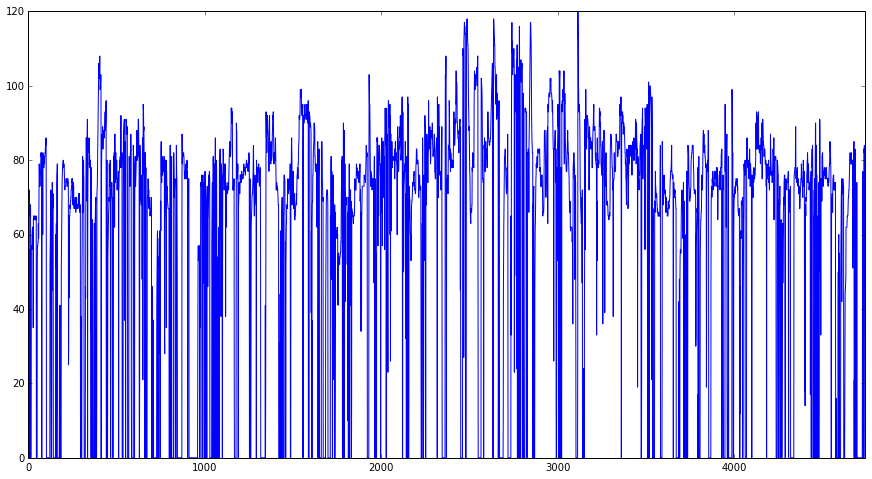

In [162]:
start = 0
points = len(blake_t.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(blake_t.get_cadence())
plt.axis( [start,start + points,0,120])
plt.show()

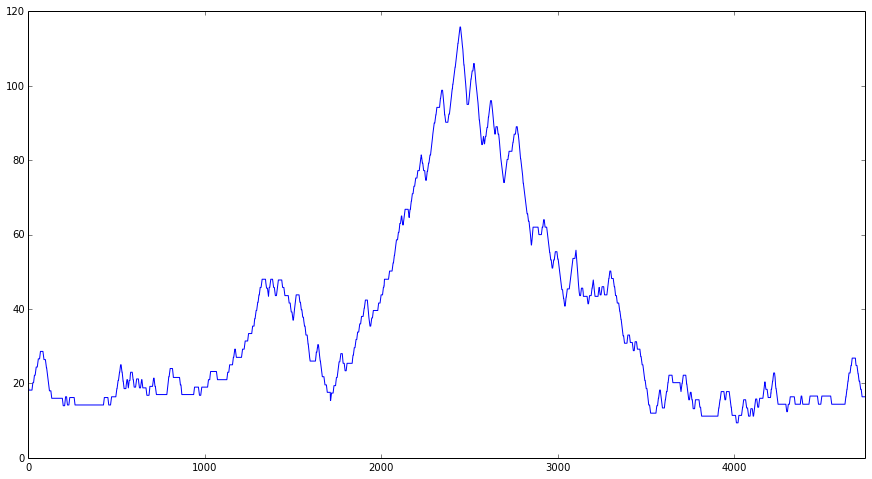

In [174]:
start = 0
points = len(blake_t.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(blake_t.get_altitude())
plt.axis( [start,start + points,0,120])
plt.show()

In [135]:
stuff = [i['time'] for i in blake_t.get_times(3) ]
print stuff[:3]
blake1 = TimeSeries("Blakes Cross - Barry - Split1", blake_t.get_times(1), 0)
blake1.my_diffs[:3]

TypeError: string indices must be integers, not str

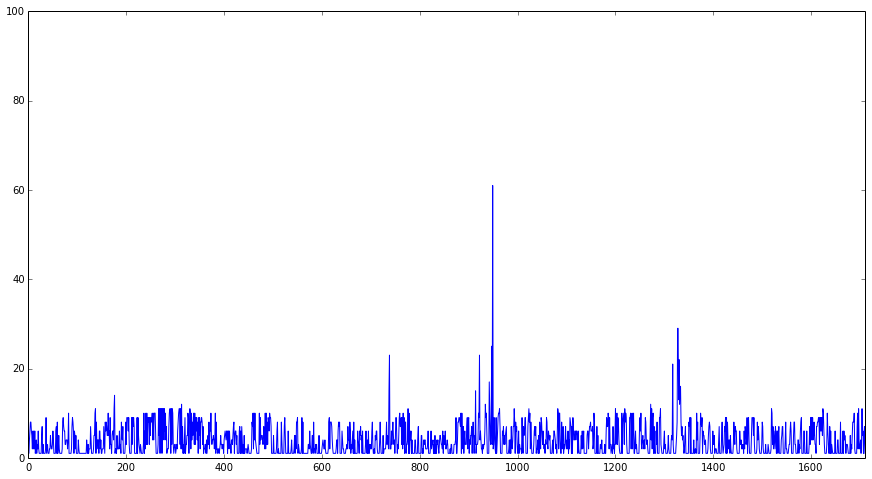

In [121]:
start = 0

points = len(blake1.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(blake1.my_diffs)
plt.axis( [start,start + points,0,100])
plt.show()

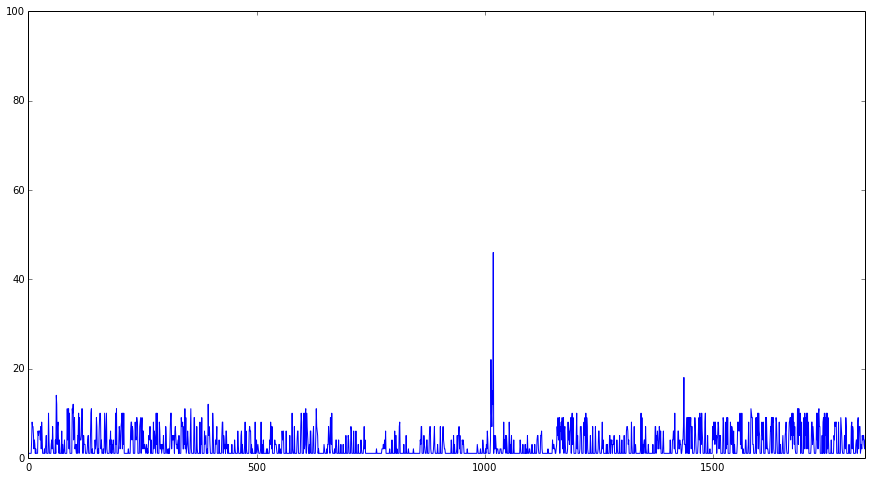

In [78]:
start = 0
points = len(blake_t2.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(blake_t2.my_diffs)
plt.axis( [start,start + points,0,100])
plt.show()

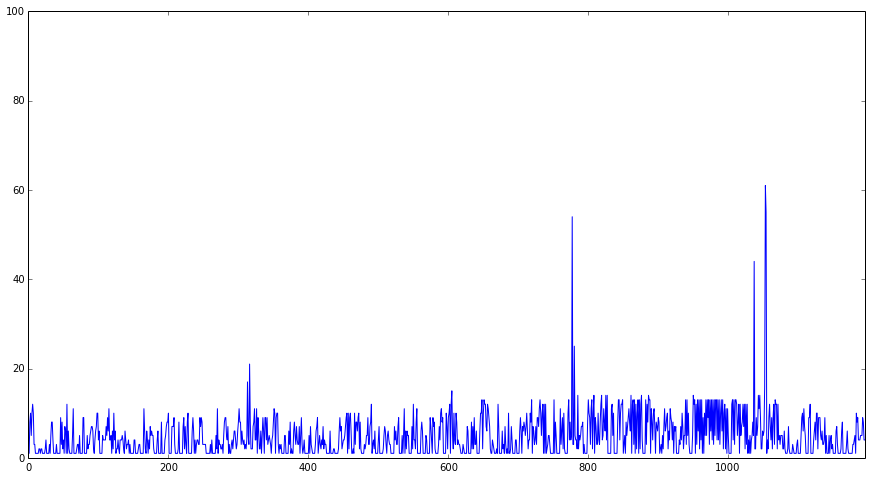

In [79]:
start = 0
points = len(blake_t3.my_diffs)
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(blake_t3.my_diffs)
plt.axis( [start,start + points,0,100])
plt.show()

In [20]:
blake_t_low_low.my_diffs_distribution

[(1, 571),
 (2, 204),
 (3, 190),
 (4, 137),
 (5, 111),
 (6, 122),
 (7, 81),
 (8, 90),
 (9, 93),
 (10, 61),
 (11, 31),
 (12, 4),
 (13, 1),
 (14, 1),
 (15, 2),
 (16, 2),
 (17, 1),
 (21, 1),
 (22, 1),
 (23, 2),
 (25, 1),
 (29, 2),
 (61, 1)]

In [31]:
blake_t_low_high.my_diffs_distribution

[(1, 984),
 (2, 161),
 (3, 137),
 (4, 108),
 (5, 94),
 (6, 75),
 (7, 84),
 (8, 60),
 (9, 58),
 (10, 49),
 (11, 16),
 (12, 4),
 (14, 1),
 (15, 1),
 (18, 1),
 (46, 1),
 (22, 1)]

In [33]:
blake_t_high.my_diffs_distribution

[(1, 381),
 (2, 102),
 (3, 111),
 (4, 104),
 (5, 81),
 (6, 68),
 (7, 64),
 (8, 53),
 (9, 57),
 (10, 48),
 (11, 26),
 (12, 38),
 (13, 43),
 (14, 11),
 (15, 1),
 (16, 1),
 (17, 1),
 (21, 1),
 (25, 1),
 (44, 1),
 (54, 1),
 (55, 1),
 (61, 1)]

In [ ]:
l = [3,2,7,8]


In [61]:
my_diffs_sorted = sorted(blake_t.my_diffs, reverse=True)

In [59]:
l

[3, 2, 7, 8]

In [60]:
y

[8, 7, 3, 2]

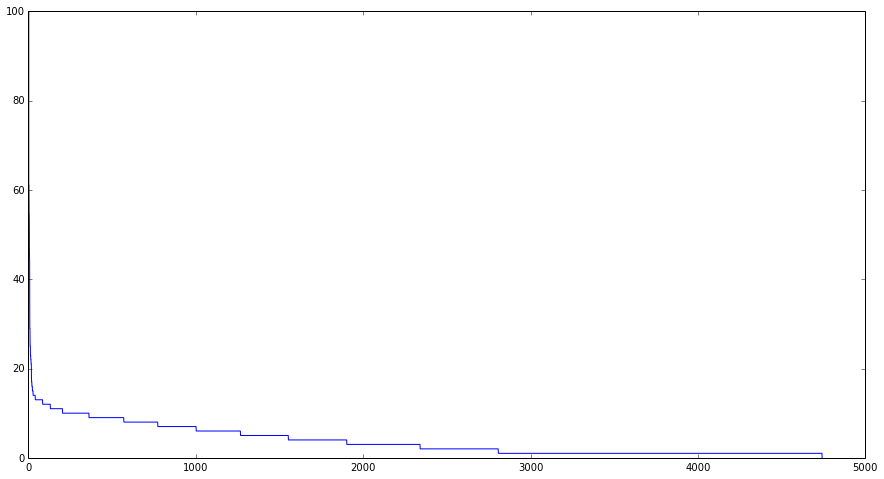

In [67]:
start = 0
points = 5000
min = 0
max = 100
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(my_diffs_sorted)
plt.axis( [start,start + points, min, max])
plt.show()

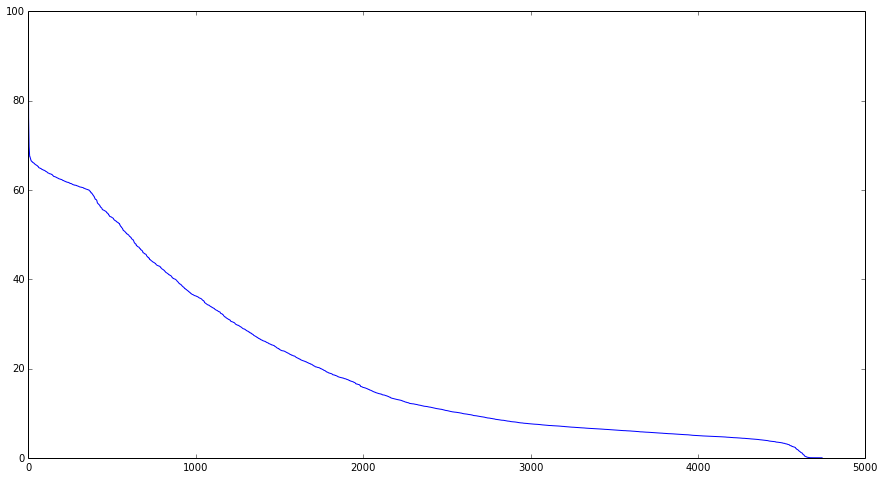

NameError: name 'average' is not defined

In [242]:
start = 0
points = 5000
min = 0
max = 100
fig = plt.figure(figsize=(15, 8), dpi=100)
#ll = plt.semilogy(blake_t.my_diffs)
ll = plt.plot(  sorted( blake_t.get_distance_delta() , reverse=True) )
plt.axis( [start,start + points, min, max])
plt.show()


In [247]:
print ( sum(list( blake_t.get_distance_delta()) )/ 4300)

22.644934593


In [72]:
from sets import Set

In [84]:
diff_set = Set(blake_t.my_diffs)

In [85]:
diff_set

Set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 25, 29, 44, 46, 54, 55, 61, 1381, 2295])

In [76]:
len(diff_set)

31

In [40]:
from collections import Counter
my_cnt = Counter(blake_t.my_diffs)

In [41]:
my_cnt

Counter({1: 1935, 2: 467, 3: 438, 4: 349, 5: 286, 6: 265, 7: 229, 9: 208, 8: 203, 10: 158, 11: 73, 12: 46, 13: 44, 14: 13, 15: 4, 16: 3, 17: 2, 21: 2, 22: 2, 23: 2, 25: 2, 29: 2, 61: 2, 18: 1, 44: 1, 46: 1, 54: 1, 55: 1, 1381: 1, 2295: 1})

In [53]:
xxx = list(my_cnt)
xxx[-1]
blake_t.my_diffs.index(xxx[-2])

1711

In [97]:
x = my_cnt.items()
sum(my_cnt.values() )

4742

In [96]:
x

[(1, 1935),
 (2, 467),
 (3, 438),
 (4, 349),
 (5, 286),
 (6, 265),
 (7, 229),
 (8, 203),
 (9, 208),
 (10, 158),
 (11, 73),
 (12, 46),
 (13, 44),
 (14, 13),
 (15, 4),
 (16, 3),
 (17, 2),
 (18, 1),
 (21, 2),
 (22, 2),
 (23, 2),
 (25, 2),
 (29, 2),
 (44, 1),
 (46, 1),
 (54, 1),
 (55, 1),
 (61, 2),
 (1381, 1),
 (2295, 1)]

In [99]:
x1,y1 = zip(x)

ValueError: too many values to unpack